In [218]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [219]:
df= pd.read_csv('AviationData.csv', encoding='latin1')

C:\Users\HP\AppData\Local\Temp\ipykernel_19364\701738647.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('AviationData.csv', encoding='latin1')


In [220]:
df= pd.read_csv('AviationData.csv', encoding='latin1', low_memory= 'False')

C:\Users\HP\AppData\Local\Temp\ipykernel_19364\2995084210.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('AviationData.csv', encoding='latin1', low_memory= 'False')


In [221]:
print(df.iloc[:,[6,7,28]].head())
print(df.iloc[:,[6,7,28]].info())

    Latitude  Longitude Broad.phase.of.flight
0        NaN        NaN                Cruise
1        NaN        NaN               Unknown
2  36.922223 -81.878056                Cruise
3        NaN        NaN                Cruise
4        NaN        NaN              Approach
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Latitude               34382 non-null  object
 1   Longitude              34373 non-null  object
 2   Broad.phase.of.flight  61724 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB
None


In [222]:
print(df['Longitude'].unique())
print(df['Latitude'].unique())
print(df['Broad.phase.of.flight'].unique())

[nan -81.878056 -70.758333 ... '1114536W' '0835218W' '0121410W']
[nan 36.922223 42.445277 ... '321814N' '039101N' '373829N']
['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other' nan]


In [223]:
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')  
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].replace({'NA': None, '': None})
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [224]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [225]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,NaN,NaN,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [226]:
df.shape

(88889, 31)

In [227]:
df = df.dropna(subset=['Longitude', 'Latitude','Broad.phase.of.flight',])
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,Unknown,NaN,1.0,NaN,NaN,NaN,IMC,Landing,Probable Cause,30-04-2008
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,28-03-2006
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.120000,-113.887500,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,23-07-2003


In [228]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
63907,20071231X02014,Accident,DFW08FA053,2007-12-29,"Venice, LA",United States,28.958056,-89.258889,NaN,South Pass 38,...,NaN,NaN,1.0,1.0,2.0,NaN,IMC,Approach,Probable Cause,15-07-2009
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,34.688611,-87.920000,NaN,NaN,...,Other Work Use,NaN,3.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,15-01-2009
63909,20080114X00045,Accident,LAX08FA043,2007-12-30,"PASO ROBLES, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,20-06-2014
63910,20080129X00122,Accident,CHI08CA057,2007-12-30,"ALEXANDRIA, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,28-02-2008
63911,20080125X00106,Accident,SEA08CA056,2007-12-31,"SANTA ANA, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,Landing,Probable Cause,28-02-2008


In [229]:
df.sample(3,random_state=42)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
53454,20020924X05205,Accident,NYC02LA186,2002-09-07,"JAMESTOWN, KY",United States,36.903056,-85.024167,K24,RUSSELL COUNTY,...,Other Work Use,NaN,NaN,NaN,NaN,2.0,VMC,Maneuvering,Probable Cause,18-04-2003
62943,20070806X01121,Accident,NYC07LA168,2007-07-15,"E.STROUDSBURG, PA",United States,41.040000,-75.173334,N53,Stroudsburg-Pocono Airport,...,Personal,NaN,0.0,1.0,0.0,0.0,VMC,Approach,Probable Cause,24-12-2008
63386,20071005X01525,Accident,NYC07LA227,2007-09-14,"WEST CHESTER, PA",United States,39.990277,-75.581945,OQN,Brandywinde Airport,...,Personal,NaN,NaN,1.0,1.0,NaN,VMC,Landing,Probable Cause,28-05-2008


In [230]:
df.shape

(11485, 31)

In [231]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [232]:
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
5      20170710X52551           Accident      NYC79AA106  1979-09-17   
593    20080417X00504           Accident      MIA08CA076  1982-03-16   
3654   20051208X01953           Accident      SEA83LA209  1983-01-08   
6202   20020904X01525           Accident      SEA83FA208  1983-09-09   
...               ...                ...             ...         ...   
63907  20071231X02014           Accident      DFW08FA053  2007-12-29   
63908  20080109X00032           Accident      NYC08FA071  2007-12-30   
63909  20080114X00045           Accident      LAX08FA043  2007-12-30   
63910  20080129X00122           Accident      CHI08CA057  2007-12-30   
63911  20080125X00106           Accident      SEA08CA056  2007-12-31   

              Location        Country   Latitude   Longitude Airport.Code  \
2        Saltville, VA  Un

In [233]:
df.describe(include='float')

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,11485.000000,11485.000000,11372.000000,2427.000000,1740.000000,2291.000000,7108.000000
mean,38.969153,-100.677960,1.134717,1.701277,1.193678,1.446966,7.438801
std,8.755856,23.168674,0.428270,1.178333,0.773977,1.718676,33.746192
min,-78.016945,-174.296666,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.636666,-116.818334,1.000000,1.000000,1.000000,1.000000,1.000000
50%,38.283333,-96.421945,1.000000,1.000000,1.000000,1.000000,2.000000
75%,42.499722,-82.690277,1.000000,2.000000,1.000000,2.000000,2.000000
max,87.145833,174.333333,4.000000,19.000000,9.000000,43.000000,699.000000


In [234]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [235]:
df.describe(include='O').T

,count,unique,top,freq
Event.Id,11485,11339,20020731X01266,2
Investigation.Type,11485,2,Accident,11184
Accident.Number,11485,11485,NYC07LA005,1
Event.Date,11485,2596,2005-08-06,18
Location,11481,6055,"ANCHORAGE, AK",74
Country,11485,13,United States,11463
Airport.Code,7412,3389,NONE,191
Airport.Name,7546,5115,Private,49
Injury.Severity,11485,13,Non-Fatal,8858
Aircraft.damage,11206,3,Substantial,8937


In [236]:
df=df.copy(deep=True)
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,Unknown,NaN,1.0,NaN,NaN,NaN,IMC,Landing,Probable Cause,30-04-2008
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,28-03-2006
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.120000,-113.887500,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,23-07-2003


In [237]:
df.columns=df.columns.str.replace('.','_')
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [238]:
df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      4
Country                       0
Latitude                      0
Longitude                     0
Airport_Code               4073
Airport_Name               3939
Injury_Severity               0
Aircraft_damage             279
Aircraft_Category          7931
Registration_Number          80
Make                          3
Model                         6
Amateur_Built                14
Number_of_Engines           113
Engine_Type                 328
FAR_Description            7927
Schedule                  10597
Purpose_of_flight           876
Air_carrier               11099
Total_Fatal_Injuries       9058
Total_Serious_Injuries     9745
Total_Minor_Injuries       9194
Total_Uninjured            4377
Weather_Condition            26
Broad_phase_of_flight         0
Report_Status                 0
Publication_Date              0
dtype: i

In [239]:
df1=pd.read_csv('USState_Codes.csv')

In [240]:
df2=pd.concat([df, df1])
df2

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,US_State,Abbreviation
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,NaN,NaN
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,NaN,NaN
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,1.0,NaN,NaN,NaN,IMC,Landing,Probable Cause,30-04-2008,NaN,NaN
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,NaN,NaN,...,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,28-03-2006,NaN,NaN
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.120000,-113.887500,NaN,NaN,...,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,23-07-2003,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Virgin Islands,VI
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Washington_DC,DC
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gulf of mexico,GM
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atlantic ocean,AO


In [241]:
df2.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date', 'US_State', 'Abbreviation'],
      dtype='object')

In [242]:
df2 = df2.dropna(subset=['Total_Fatal_Injuries', 'Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured'])
df2.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,US_State,Abbreviation
44870,20001211X11043,Accident,FTW98FA380,1998-09-11,"HOUSTON, TX",United States,29.607222,-95.158611,EFD,Ellington Field,...,0.0,0.0,0.0,2.0,IMC,Approach,Probable Cause,26-02-2007,NaN,NaN
45404,20001211X11573,Accident,LAX99FA051,1998-12-17,"LOS ANGELES, CA",United States,33.948611,-118.413611,LAX,Los Angeles International,...,0.0,0.0,0.0,7.0,VMC,Cruise,Probable Cause,25-11-2003,NaN,NaN
45592,20001205X00119,Incident,ANC99IA027,1999-02-05,"FAIRBANKS, AK",United States,64.800000,-147.866111,FAI,Fairbanks International,...,0.0,0.0,0.0,138.0,IMC,Takeoff,Probable Cause,01-07-2002,NaN,NaN
46059,20001212X18855,Accident,NYC99FAMS3,1999-05-06,"PLYMOUTH, MA",United States,41.908889,-70.728611,NaN,NaN,...,1.0,0.0,0.0,0.0,IMC,Maneuvering,Probable Cause,30-03-2004,NaN,NaN
46589,20001212X19310,Accident,LAX99MA251,1999-07-13,"MINDEN, NV",United States,38.981667,-119.672778,NaN,NaN,...,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,30-09-2002,NaN,NaN


<Axes: xlabel='Broad_phase_of_flight'>

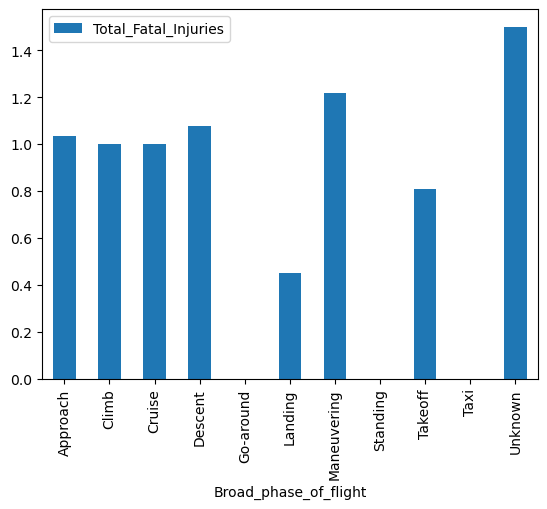

In [243]:
df2.groupby('Broad_phase_of_flight')[['Total_Fatal_Injuries']].mean().plot(kind='bar')

<Axes: xlabel='Broad_phase_of_flight'>

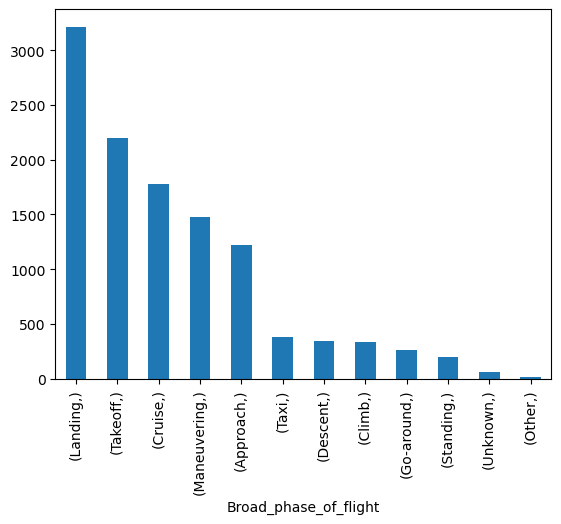

In [244]:
df[['Broad_phase_of_flight']].value_counts().plot(kind='bar')

In [245]:
df2.groupby('Weather_Condition')['Weather_Condition'].count()

Weather_Condition
IMC     28
VMC    186
Name: Weather_Condition, dtype: int64

In [246]:
df2.groupby('US_State')['US_State'].count()

Series([], Name: US_State, dtype: int64)

In [247]:
df2.count()

Event_Id                  217
Investigation_Type        217
Accident_Number           217
Event_Date                217
Location                  217
Country                   217
Latitude                  217
Longitude                 217
Airport_Code              125
Airport_Name              129
Injury_Severity           217
Aircraft_damage           201
Aircraft_Category         105
Registration_Number       215
Make                      216
Model                     217
Amateur_Built             216
Number_of_Engines         209
Engine_Type               206
FAR_Description           106
Schedule                   30
Purpose_of_flight         198
Air_carrier                15
Total_Fatal_Injuries      217
Total_Serious_Injuries    217
Total_Minor_Injuries      217
Total_Uninjured           217
Weather_Condition         214
Broad_phase_of_flight     217
Report_Status             217
Publication_Date          217
US_State                    0
Abbreviation                0
dtype: int

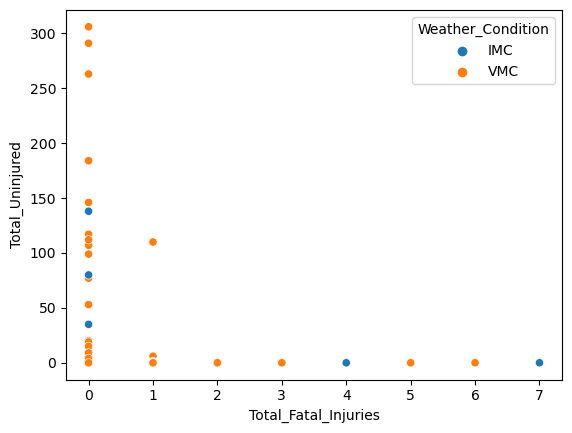

In [248]:
sns.scatterplot(x ='Total_Fatal_Injuries', y= 'Total_Uninjured', hue='Weather_Condition', data=df2);

In [251]:
df2.shape

(217, 33)

In [250]:
df2.to_csv('Aviation_data2.csv',index=False)